In [92]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import pandas as pd

from lib.Diccionariacion import awards_wipo, awards_gdp
from lib.Tratamiento import inv_dict
from scipy.optimize import curve_fit

In [2]:
root = r'.'

In [80]:
results_wipo = root + r'\data\results\wipo\2015-2019\Ranking_DCI_wipo.csv'
results_awards = root + r'\data\results\awards\Ranking_DCI_awards.csv'
PIB_mean = root + r'\data\datasets\IMF_GDP_per_PPA_April_2024.xlsx'
Design_indicators = root + r'\data\datasets\design-indicators_02.xlsx'
df = pd.read_excel(PIB_mean).loc[:, ['Country', 'mean_2']]
df_design = pd.read_excel(Design_indicators, sheet_name = 'Indicators').loc[:, ['country', 'score', 'ranking_name']]

DCI_awards = {}
DCI_wipo = {}
PIB = {}

with open(results_awards, 'r', encoding = 'utf-8') as file:
    for row in file.readlines()[1:]:
        dci, country = row.rstrip('\n').split(',')[1:]
        DCI_awards[country] = float(dci)

with open(results_wipo, 'r', encoding = 'utf-8') as file:
    for row in file.readlines()[1:]:
        dci, country = row.rstrip('\n').split(',')[1:]
        DCI_wipo[country] = float(dci)

for i in range(len(df)):
    PIB.update([df.loc[i]])

set(df_design['ranking_name'])

{'ADA_2023',
 'DCR_2002',
 'DCR_2005',
 'DCR_2007',
 'DCR_2008',
 'DCR_2010',
 'GDR_2023',
 'IDS_abs',
 'IDS_rel'}

In [139]:
All_rankings = list(set(df_design['ranking_name']))

Design_scores = {
    ranking: group.set_index('country')['score'].to_dict()
    for ranking, group in df_design.groupby('ranking_name')
}

ADA_2023

{'China': 16048.0,
 'Taiwan (China)': 7772.0,
 'United States of America': 5033.0,
 'Hong Kong': 3449.0,
 'Japan': 2914.0,
 'Italy': 2239.0,
 'Turkey': 2096.0,
 'United Kingdom': 1413.0,
 'Brazil': 1335.0,
 'Germany': 1290.0,
 'India': 1133.0,
 'Korea': 1077.0,
 'Iran': 1075.0,
 'Russian Federation': 1030.0,
 'Canada': 813.0,
 'Singapore': 793.0,
 'Spain': 768.0,
 'Portugal': 691.0,
 'Greece': 686.0,
 'Australia': 598.0,
 'Poland': 561.0,
 'France': 521.0,
 'Mexico': 445.0,
 'Netherlands': 428.0,
 'Hungary': 404.0,
 'Lithuania': 378.0,
 'Belgium': 372.0,
 'Malaysia': 369.0,
 'Switzerland': 352.0,
 'Ukraine': 320.0,
 'Israel': 308.0,
 'Bulgaria': 301.0,
 'Egypt': 262.0,
 'Austria': 261.0,
 'Czech Republic': 261.0,
 'Thailand': 241.0,
 'Finland': 220.0,
 'Denmark': 206.0,
 'Sweden': 190.0,
 'Romania': 189.0,
 'Viet Nam': 181.0,
 'United Arab Emirates': 170.0,
 'Lebanon': 169.0,
 'Moldova': 158.0,
 'Croatia': 150.0,
 'Argentina': 148.0,
 'Kuwait': 138.0,
 'Serbia': 130.0,
 'Ireland': 124.

46
['Taiwan (China)', 'United States of America', 'Hong Kong', 'Korea', 'Iran', 'Russian Federation', 'Czech Republic', 'Thailand', 'Finland', 'Viet Nam', 'Moldova', 'Kuwait', 'Philippines', 'Uruguay', 'Estonia', 'Cyprus', 'Colombia', 'Macau (China)', 'Slovakia', 'Kyrgyzstan', 'Qatar', 'Kazakhstan', 'Peru', 'Georgia', 'Bangladesh', 'Ecuador', 'Pakistan', 'Armenia', 'Dominican Republic', 'Iceland', 'Sri Lanka', 'Belarus', 'Bosnia and Herzegovina', "Democratic People's Republic of Korea", 'Luxembourg', 'Puerto Rico', 'Malta', 'Costa Rica', 'Cayman Islands', 'Palestine', 'Oman', 'Tunisia', 'Kosovo', 'Venezuela', 'Azerbaijan', 'Tanzania', 'Zimbabwe', 'Nicaragua', 'Faroe Islands', 'Tajikistan', 'Botswana', 'Albania', 'Guatemala', 'Morocco', 'Monaco', 'Bahrain', 'Montenegro', 'Kenya', 'Maldives', 'Liechtenstein', 'Cameroon', 'Macedonia', 'Eswatini', 'Lao', 'Cuba', 'Mongolia', 'Paraguay', 'Trinidad and Tobago']
['Czechia', 'China', 'Turkey', 'United States', 'Hungary', 'Slovakia', 'Israel', '

Text(0, 0.5, 'log ADA 2023')

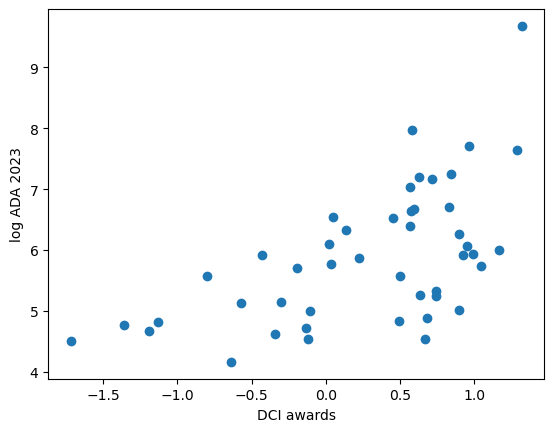

In [147]:
DCI_vs_DScore = np.zeros((2, len(DCI_awards)))
ADA_2023 = Design_scores['ADA_2023']
not_present = []

wipo_awards = inv_dict(awards_wipo)
wipo_awards['Korea'] = 'South Korea'

for n, country in enumerate(ADA_2023.keys()):
    try:
        c_awards = wipo_awards[country]
        DCI_vs_DScore[0, n] = DCI_awards[country]
        DCI_vs_DScore[1, n] = ADA_2023[country]
    except:
        not_present.append(country)
        pass


mask = DCI_vs_DScore[1, :] != 0

print(np.sum(mask))
print(not_present)
print(list(DCI_awards.keys()))

plt.scatter(DCI_vs_DScore[0, mask], np.log1p(DCI_vs_DScore[1, mask]))
plt.xlabel('DCI awards')
plt.ylabel('log ADA 2023')

['Taiwan (China)']


Text(0, 0.5, 'ADA 2023')

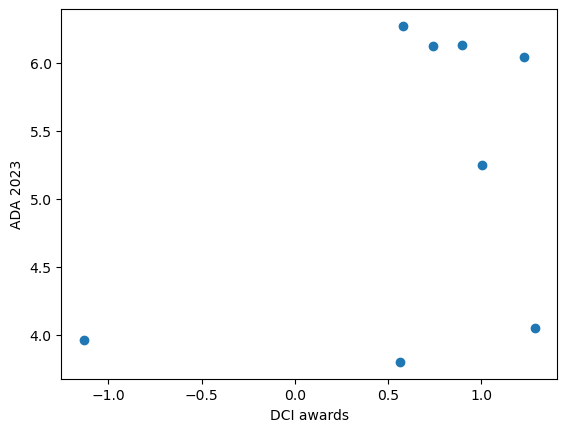

In [135]:
DCI_vs_DScore = np.zeros((2, len(DCI_awards)))
GDR_2023 = Design_scores['GDR_2023']
not_present = []

wipo_awards = inv_dict(awards_wipo)
wipo_awards['Korea'] = 'South Korea'

for n, country in enumerate(GDR_2023.keys()):
    try:
        c_awards = wipo_awards[country]
        DCI_vs_DScore[0, n] = DCI_awards[c_awards]
        DCI_vs_DScore[1, n] = GDR_2023[country]
    except:
        not_present.append(country)
        pass


mask = DCI_vs_DScore[1, :] != 0

print(not_present)


plt.scatter(DCI_vs_DScore[0, mask], DCI_vs_DScore[1, mask])
plt.xlabel('DCI awards')
plt.ylabel('ADA 2023')

No presente en Awards:  ['Hong Kong', 'Taiwan (China)', 'Luxembourg', 'Iceland', 'Brunei Darussalam', 'Cyprus', 'Estonia', 'Bahrain', 'Kuwait', 'Tunisia', 'Oman', 'Puerto Rico', 'Barbados', 'Slovakia']


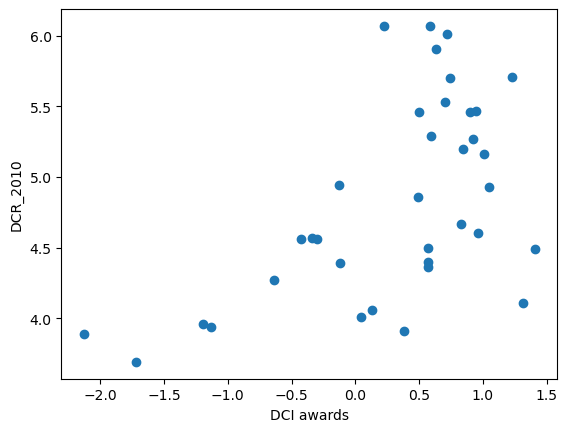

In [133]:
DCI_vs_DScore = np.zeros((2, len(DCI_awards)))
DCR_2010 = Design_scores['DCR_2010']
not_present = []

wipo_awards = inv_dict(awards_wipo)
wipo_awards['Korea'] = 'South Korea'
wipo_awards['Finland'] = 'Finland'
wipo_awards['Qatar'] = 'Qatar'
wipo_awards['Thailand'] = 'Thailand'

for n, country in enumerate(DCR_2010.keys()):
    try:
        c_awards = wipo_awards[country]
        DCI_vs_DScore[0, n] = DCI_awards[c_awards]
        DCI_vs_DScore[1, n] = DCR_2010[country]
    except:
        not_present.append(country)
        pass


mask = DCI_vs_DScore[1, :] != 0

print('No presente en Awards: ', not_present)


plt.scatter(DCI_vs_DScore[0, mask], DCI_vs_DScore[1, mask])
plt.xlabel('DCI awards')
plt.ylabel('DCR_2010');

In [ ]:
DCI_vs_DScore = np.zeros((2, len(DCI_awards)))
DCR_2010 = Design_scores['DCR_2010']
not_present = []

wipo_awards = inv_dict(awards_wipo)
wipo_awards['Korea'] = 'South Korea'
wipo_awards['Finland'] = 'Finland'
wipo_awards['Qatar'] = 'Qatar'
wipo_awards['Thailand'] = 'Thailand'

for n, country in enumerate(DCR_2010.keys()):
    try:
        c_awards = wipo_awards[country]
        DCI_vs_DScore[0, n] = DCI_awards[c_awards]
        DCI_vs_DScore[1, n] = DCR_2010[country]
    except:
        not_present.append(country)
        pass


mask = DCI_vs_DScore[1, :] != 0

print('No presente en Awards: ', not_present)


plt.scatter(DCI_vs_DScore[0, mask], DCI_vs_DScore[1, mask])
plt.xlabel('DCI awards')
plt.ylabel('DCR_2010');

In [ ]:
DCI_vs_DScore = np.zeros((2, len(DCI_awards)))
ADA_2023 = Design_scores['ADA_2023']
for n, c_award in enumerate(DCI_awards):
    try:
        c_wipo = awards_wipo[c_award]
        DCI_vs_DScore[0, n] = DCI_awards[c_award]
        DCI_vs_DScore[1, n] = ADA_2023[c_award]
    except:
        pass

72


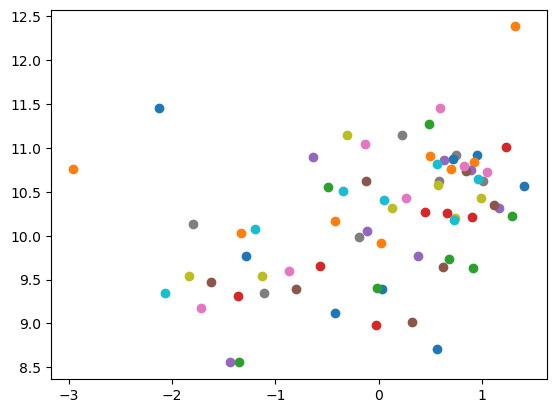

In [68]:
PIB_vs_DCI = np.zeros((2, len(DCI_awards)))
for country, dci in DCI_awards.items():
    pbi = PIB[awards_gdp[country]]
    plt.scatter(dci, np.log1p(pbi))

print(len(DCI_awards))

In [4]:
DCIs_PIB = np.full((len(awards_wipo), 3), fill_value = np.nan)
paises = []
with open(root + r'\test\Triplete_DCI.csv', 'w+', encoding = 'utf-8') as f:
    f.write('country,dci_award,dci_wipo,pib_mean\n')
    for n, (c_award, c_wipo) in enumerate(awards_wipo.items()):
        c_gdp = awards_gdp[c_award]
        if c_wipo is not None:
            dci_award = DCI_awards[c_award]
            dci_wipo = DCI_wipo[c_wipo]
            pib_mean = PIB[c_gdp]
            DCIs_PIB[n] = [dci_award, dci_wipo, pib_mean]
            paises.append(c_gdp)
            f.write(f'{c_gdp},{dci_award},{dci_wipo},{pib_mean}\n')

    

In [6]:
len(DCIs_PIB)

56

In [47]:
mask = np.isnan(DCIs_PIB[:, 0])
DCIs = DCIs_PIB[:, 0:2][~mask]
DCI_eff_awards, DCI_eff_wipo = DCIs.T
PIB_eff = DCIs_PIB[:, 2][~mask]

In [6]:
X = np.array([np.min(doble_DCI[:, 0][~mask]), np.max(doble_DCI[:, 0][~mask])])
Y = m * X + c

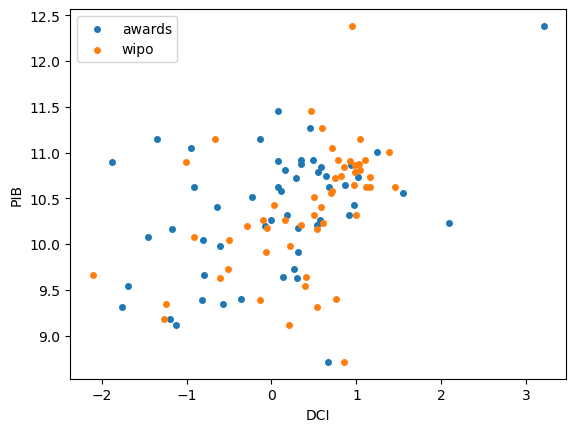

In [29]:
plt.scatter(DCI_eff_awards, np.log1p(PIB_eff), s = 4**2, label = 'awards')
plt.scatter(DCI_eff_wipo, np.log1p(PIB_eff), s = 4**2, label = 'wipo')
#plt.plot(X, Y, label = f'$m = {m:.3f}$\n$\\rho^2={rho**2:.3f}$\n$p={pvalue:.3f}$', color = 'tab:red', linestyle = '--', alpha = 0.7)

plt.xlabel('DCI')
plt.ylabel('PIB')
plt.legend()

In [51]:
Y = lambda X, a, b, c: a + b * X[:, 0] + c * X[:, 1]
curve_fit(Y, DCIs, PIB_eff)

(array([37172.2800002 , 15117.19944179,  5753.4063729 ]),
 array([[ 22017995.53422396,   4307067.23093519, -13992124.31209144],
        [  4307067.23093519,  23583241.2504434 , -14377556.00932402],
        [-13992124.31209144, -14377556.00932402,  39067152.27602208]]))

np.False_